#Introduction

In this project we try to solve classification problem for Fashion-Mnist dataset with some machine learning methods learnt from Machine learning course.
The algirithms that will be used are:


*  Perceptron
* Logistic Regression
* KNN
* Kernel Methods
* Neural Networks
* Ensemble elarning





# Dataset
Our dataset consist of 60000 training instances and 10000 test instances. From taringn set we take some instances for validation set. So in the end we get 48000 elements in training set, 12000 in validation and 10000 in test.

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
import pickle

Load data

In [ ]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Print the shape of the datasets
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


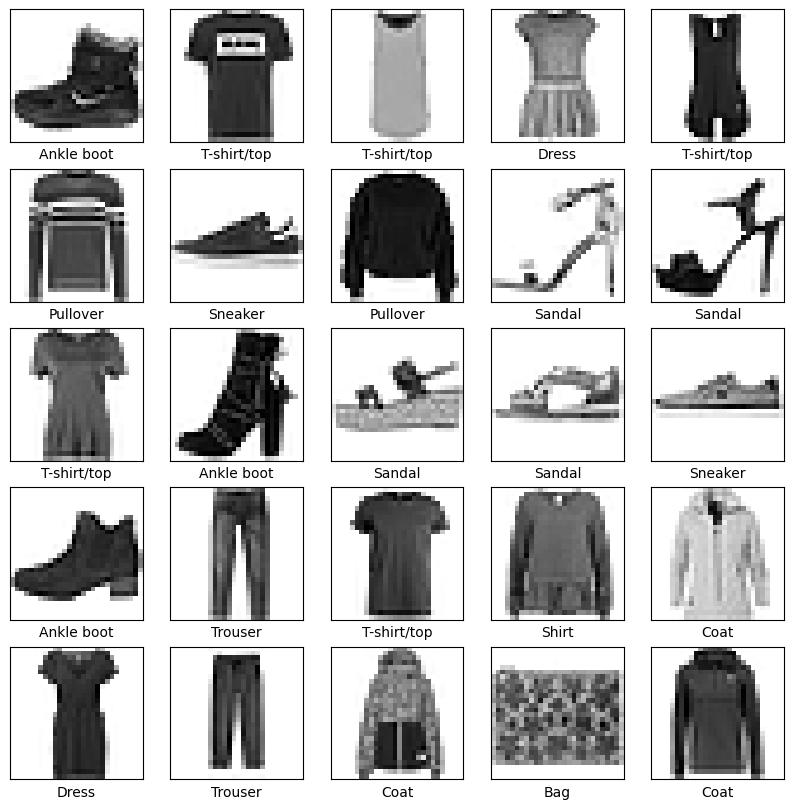

In [ ]:
# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot some examples from the training set
def plot_images(images, labels, class_names, num_rows=5, num_cols=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

# Plot the images
plot_images(train_images, train_labels, class_names)


#Perceptron

In [ ]:
# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the images for the perceptron and logistic regression models
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)


print(f"Train images shape: {train_images_flat.shape}")
print(f"Test images shape: {test_images_flat.shape}")

Train images shape: (60000, 784)
Test images shape: (10000, 784)


In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Create and train the perceptron model
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=1)
perceptron.fit(train_images_flat, train_labels)


# Predict on the test set
test_predictions = perceptron.predict(test_images_flat)
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test accuracy with Perceptron: {test_accuracy}")

# Predict on the train set
train_predictions = perceptron.predict(train_images_flat)
train_accuracy = accuracy_score(train_labels, train_predictions)
print(f"Train accuracy with Perceptron: {train_accuracy}")



Test accuracy with Perceptron: 0.7977
Train accuracy with Perceptron: 0.8212833333333334


Lets try to save the model on a drive

In [ ]:
# save the model to disk
filename = 'perceptron_1.sav'
pickle.dump(perceptron, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test_images_flat, test_labels)
print(result)


0.7977


The best perceptron tested got 83.82% accuracy on train set and 82.03% on validation set. The accuracy on a test set is 81.28%.

##Perceptron with gridsearch

Here we can see that we tested also different penalties for perceptron using Grid search and 5 cross-validation. But in the result it didn't improve the accuracy.

In [ ]:
parameters = {
    'alpha': [0.0001, 0.001]
}

# Initialize GridSearchCV with the Perceptron model
clf_perc = GridSearchCV(Perceptron(max_iter=1000, random_state=1), parameters, n_jobs=-1, cv=5, verbose=1)

# Fit the model on the training data
clf_perc.fit(train_images_flat, train_labels)



Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=5, estimator=Perceptron(random_state=1), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001]}, verbose=1)

In [ ]:
# Get the best parameters and best score
best_params = clf_perc.best_params_
best_score = clf_perc.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Predict on the test set using the best estimator
test_predictions = clf_perc.best_estimator_.predict(test_images_flat)
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test accuracy with tuned Perceptron: {test_accuracy}")


# Predict on the test set using the best estimator
train_predictions = clf_perc.best_estimator_.predict(train_images_flat)
train_accuracy = accuracy_score(train_labels, train_predictions)
print(f"Train accuracy with tuned Perceptron: {train_accuracy}")


Best Parameters: {'alpha': 0.0001}
Best Cross-Validation Score: 0.8090333333333334
Test accuracy with tuned Perceptron: 0.7977
Train accuracy with tuned Perceptron: 0.8212833333333334


In [ ]:
# save the model to disk
filename = 'perceptron_gs_best.sav'
pickle.dump(clf_perc, open(filename, 'wb'))



0.7977


In [ ]:
# some time later...
filename = 'perceptron_gs_best.sav'
# load the model from disk
perceptron_best = pickle.load(open(filename, 'rb'))
result = perceptron_best.score(test_images_flat, test_labels)
print(result)

FileNotFoundError: [Errno 2] No such file or directory: 'perceptron_gs_best.sav'

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {
    'C' : [0.5, 1, 2]
}
clf_log = GridSearchCV(LogisticRegression(n_jobs=-1, tol=1e-3, random_state=1), parameters, n_jobs=-1)

clf_log.fit(train_images_flat, train_labels)

# Get the best parameters and best score
best_params = clf_log.best_params_
best_score = clf_log.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")


Best Parameters: {'C': 0.5}
Best Cross-Validation Score: 0.8564333333333332


In [ ]:
# Predict on the test set using the best estimator
test_predictions = clf_log.best_estimator_.predict(test_images_flat)
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test accuracy with Logistic Regression: {test_accuracy}")

# Predict on the test set using the best estimator
train_predictions = clf_log.best_estimator_.predict(train_images_flat)
train_accuracy = accuracy_score(train_labels, train_predictions)
print(f"Train accuracy with Logistic Regression: {train_accuracy}")


Test accuracy with Logistic Regression: 0.8447
Train accuracy with Logistic Regression: 0.86665


In [ ]:
# save the model to disk
filename = 'logres_gs_best.sav'
pickle.dump(clf_log, open(filename, 'wb'))


In [ ]:
# load the model from disk
logres_best = pickle.load(open(filename, 'rb'))
result = logres_best.score(test_images_flat, test_labels)
print(result)

0.8447


#KNN

[0.8509500000000001, 0.8495166666666666, 0.8546666666666665, 0.8578166666666667, 0.8564, 0.8577, 0.85635, 0.8568999999999999, 0.8549000000000001, 0.85545, 0.85305, 0.8531500000000001, 0.8508333333333333, 0.8509166666666668, 0.8496499999999999, 0.8499166666666665, 0.8475999999999999, 0.84765, 0.8465833333333335, 0.8462666666666667, 0.8451166666666665, 0.8448333333333334, 0.8443166666666666, 0.84385, 0.8432833333333333, 0.8427, 0.8422666666666666, 0.84195, 0.8409833333333333, 0.8404166666666667]


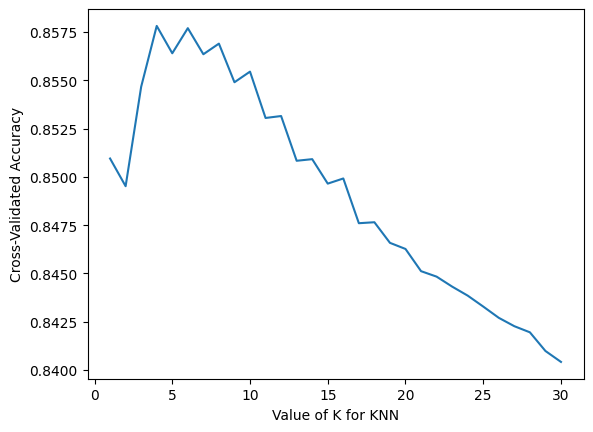

In [ ]:
from sklearn.model_selection import cross_val_score
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_images_flat, train_labels, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(train_images_flat, train_labels)


KNeighborsClassifier(n_neighbors=4)

In [ ]:
# Predict on the test set using the best estimator
test_predictions = knn.predict(test_images_flat)
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test accuracy with KNN: {test_accuracy}")

# Predict on the test set using the best estimator
train_predictions = knn.predict(train_images_flat)
train_accuracy = accuracy_score(train_labels, train_predictions)
print(f"Train accuracy with KNN: {train_accuracy}")


Test accuracy with KNN: 0.8577
Train accuracy with KNN: 0.9082166666666667


In [ ]:
# save the model to disk
filename = 'knn_gs_best.sav'
pickle.dump(knn, open(filename, 'wb'))


In [ ]:
# load the model from disk
knn_best = pickle.load(open(filename, 'rb'))
result = knn_best.score(test_images_flat, test_labels)
print(result)

0.8577


#Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree model
dt_model = DecisionTreeClassifier(random_state=1)

# Train the model
dt_model.fit(train_images_flat, train_labels)

# Evaluate the model on the validation set
y_pred = dt_model.predict(test_images_flat)
print("Validation Accuracy:", accuracy_score(test_labels, y_pred))


Validation Accuracy: 0.7919


In [ ]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5, 10]
}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [65, 75]

}

# Initialize the grid search
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=1, criterion='entropy'),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1)

# Perform the grid search
grid_search.fit(train_images_flat, train_labels)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best validation accuracy: ", grid_search.best_score_)

# Retrieve the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_test_pred = best_model.predict(test_images_flat)
print("Test Accuracy:", accuracy_score(test_labels, y_test_pred))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found:  {'criterion': 'entropy', 'min_samples_split': 65}
Best validation accuracy:  0.8094833333333332
Test Accuracy: 0.8091


In [ ]:
# Evaluate the best model on the test set
y_train_pred = best_model.predict(train_images_flat)
print("Test Accuracy:", accuracy_score(train_labels, y_train_pred))

Test Accuracy: 0.8807166666666667


In [ ]:
# save the model to disk
filename = 'tree_best.sav'
pickle.dump(best_model, open(filename, 'wb'))


In [ ]:
# load the model from disk
tree_best = pickle.load(open(filename, 'rb'))
result = tree_best.score(test_images_flat, test_labels)
print(result)

0.8091


In [ ]:
result = tree_best.score(train_images_flat, train_labels)
print(result)

#ANN




In [ ]:
!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [ ]:
# import the libraries
import tensorflow as tf
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import fashion_mnist
import numpy as np


In [ ]:
seed(1)
tf.random.set_seed(1)

In [ ]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Print the shape of the datasets
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [ ]:
# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the images for the perceptron and logistic regression models
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)


print(f"Train images shape: {train_images_flat.shape}")
print(f"Test images shape: {test_images_flat.shape}")

Train images shape: (60000, 784)
Test images shape: (10000, 784)


In [ ]:
def build_clf(units):

    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=units, activation='relu', input_shape=(784,)))  # input shape for flattened 28x28 images
    ann.add(tf.keras.layers.Dense(units=units, activation='relu', input_shape=(784,)))  # input shape for flattened 28x28 images
    ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))  # 10 units for 10 classes with softmax activation
    ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # categorical crossentropy for multiclass classification
    return ann

In [ ]:
train_labels_enc= tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_enc = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [ ]:
X_train = train_images_flat
y_train = train_labels_enc
X_test = test_images_flat
y_test = test_labels_enc

In [ ]:
model=KerasClassifier(build_fn=build_clf)

<ipython-input-114-94990c6d4461>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=build_clf)


In [ ]:
'''
params={'batch_size':[50, 100],
		'nb_epoch':[20],
		'units':[ 5, 10, 15, 20, 25, 30]
		}

'''

In [ ]:
params={'batch_size':[50, 100],
		'nb_epoch':[20],
		'units':[  5, 10, 15, 20, 25, 30]
		}
gs=GridSearchCV(estimator=model, param_grid=params, cv=3)
# now fit the dataset to the GridSearchCV object.
gs = gs.fit(X_train, y_train)


1200/1200 [==============================] - 6s 5ms/step - loss: 0.5736 - accuracy: 0.7967


In [ ]:
best_params=gs.best_params_
accuracy=gs.best_score_


In [ ]:
# Evaluate the best model on the test set
test_accuracy = gs.score(X_test, y_test)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy:.4f}')

200/200 [==============================] - 1s 2ms/step - loss: 0.4800 - accuracy: 0.8235
Test Accuracy: 0.8235


In [ ]:
print(best_params)
print(accuracy)

{'batch_size': 50, 'nb_epoch': 20, 'units': 30}
0.8355999787648519


In [ ]:
print(type(params['nb_epoch']))

<class 'list'>


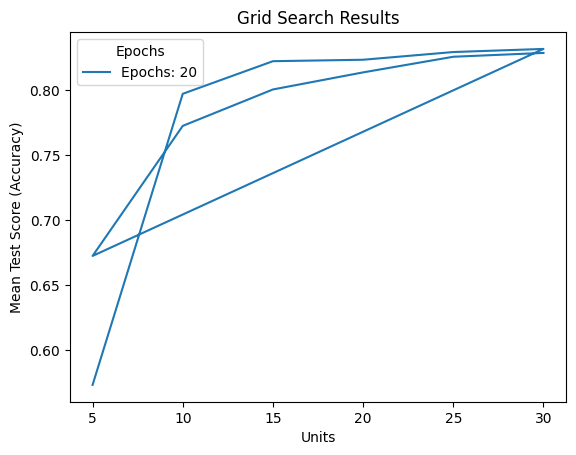

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the results
def plot_results_2d(results):
    mean_test_scores = results['mean_test_score']
    params = results['params']

    # Extracting the parameter values from the list of dictionaries
    epochs = [param['nb_epoch'] for param in params]
    units = [param['units'] for param in params]

    # Create a 2D plot
    fig, ax = plt.subplots()

    # Plot each set of results with a different color for each epoch value
    for epoch_value in set(epochs):
        idx = [i for i, e in enumerate(epochs) if e == epoch_value]
        ax.plot(np.array(units)[idx], np.array(mean_test_scores)[idx], label=f'Epochs: {epoch_value}')

    # Add labels and title
    ax.set_xlabel('Units')
    ax.set_ylabel('Mean Test Score (Accuracy)')
    ax.set_title('Grid Search Results')
    ax.legend(title='Epochs')

    plt.show()


results = gs.cv_results_
# Example usage (assuming `results` is already obtained from GridSearchCV)
plot_results_2d(results)


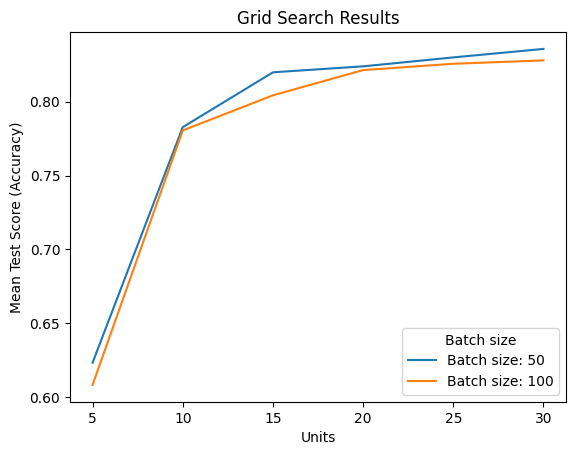

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the results
def plot_results_2d(results):
    mean_test_scores = results['mean_test_score']
    params = results['params']

    # Extracting the parameter values from the list of dictionaries
    epochs = [param['batch_size'] for param in params]
    units = [param['units'] for param in params]

    # Create a 2D plot
    fig, ax = plt.subplots()

    # Plot each set of results with a different color for each epoch value
    for epoch_value in set(epochs):
        idx = [i for i, e in enumerate(epochs) if e == epoch_value]
        ax.plot(np.array(units)[idx], np.array(mean_test_scores)[idx], label=f'Batch size: {epoch_value}')

    # Add labels and title
    ax.set_xlabel('Units')
    ax.set_ylabel('Mean Test Score (Accuracy)')
    ax.set_title('Grid Search Results')
    ax.legend(title='Batch size')

    plt.show()


results = gs.cv_results_
# Example usage (assuming `results` is already obtained from GridSearchCV)
plot_results_2d(results)

In [ ]:
best_model = gs.best_estimator_

# Train the best model again with validation split to get the history
history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=gs.best_params_['nb_epoch'], batch_size=gs.best_params_['batch_size'], verbose=0)



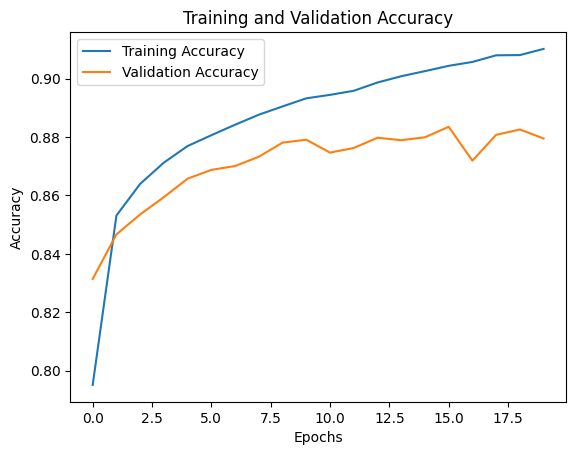

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy:.4f}')

200/200 [==============================] - 1s 3ms/step - loss: 0.3813 - accuracy: 0.8737
Test Accuracy: 0.8737


In [ ]:
train_accuracy = best_model.score(X_train, y_train)
print(train_accuracy)

1200/1200 [==============================] - 4s 3ms/step - loss: 0.2546 - accuracy: 0.9073
0.9073166847229004


Here we can implement early stopping

In [ ]:
best_model = gs.best_estimator_

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)


# Train the best model again with validation split to get the history
history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=gs.best_params_['nb_epoch'], batch_size=gs.best_params_['batch_size'], verbose=0, callbacks=[callback])

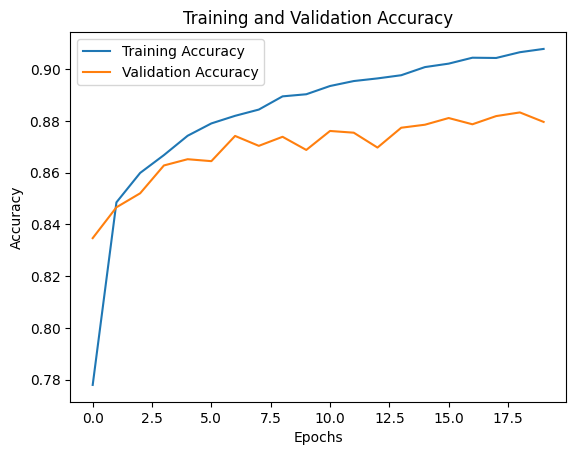

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy:.4f}')

200/200 [==============================] - 1s 2ms/step - loss: 0.3788 - accuracy: 0.8710
Test Accuracy: 0.8710


In [ ]:
train_accuracy = best_model.score(X_train, y_train)
print(train_accuracy)

1200/1200 [==============================] - 10s 8ms/step - loss: 0.2599 - accuracy: 0.9046
0.9046000242233276


#CNN with some modifications

In [ ]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Print the shape of the datasets
print(f"Train images shape: {X_train.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Test images shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)

(48000, 28, 28)
(48000,)
(12000, 28, 28)
(12000,)


In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=98, activation='relu'))
cnn_model.add(Dense(units=10, activation='softmax'))

In [ ]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.Accuracy(name='accuracy')
]

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

In [ ]:
epochs = 20
batch_size = 50

history = cnn_model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_validate, y_validate)
)

Epoch 1/20
960/960 [==============================] - 27s 28ms/step - loss: 0.3791 - accuracy: 0.8629 - val_loss: 0.3896 - val_accuracy: 0.8553
Epoch 2/20
960/960 [==============================] - 26s 27ms/step - loss: 0.3256 - accuracy: 0.8801 - val_loss: 0.3462 - val_accuracy: 0.8746
Epoch 3/20
960/960 [==============================] - 24s 25ms/step - loss: 0.2962 - accuracy: 0.8902 - val_loss: 0.3210 - val_accuracy: 0.8815
Epoch 4/20
960/960 [==============================] - 24s 25ms/step - loss: 0.2680 - accuracy: 0.9003 - val_loss: 0.3106 - val_accuracy: 0.8882
Epoch 5/20
960/960 [==============================] - 27s 28ms/step - loss: 0.2505 - accuracy: 0.9063 - val_loss: 0.3180 - val_accuracy: 0.8863
Epoch 6/20
960/960 [==============================] - 26s 27ms/step - loss: 0.2338 - accuracy: 0.9106 - val_loss: 0.3485 - val_accuracy: 0.8829
Epoch 7/20
960/960 [==============================] - 24s 25ms/step - loss: 0.2229 - accuracy: 0.9155 - val_loss: 0.3319 - val_accuracy:

Text(0.5, 1.0, 'Accuracy evolution')

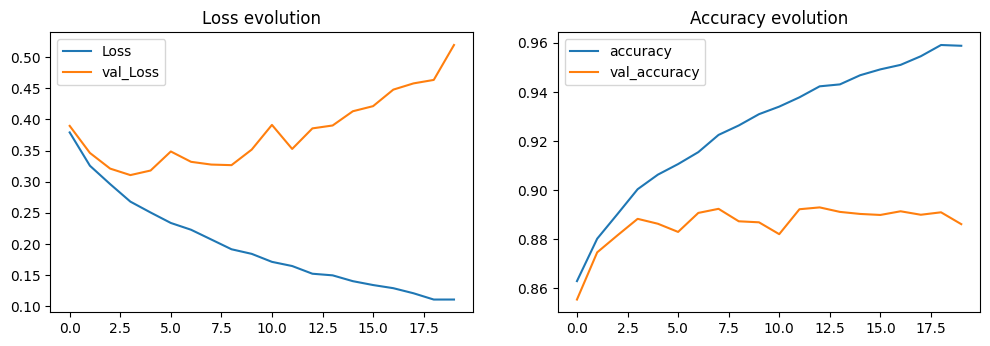

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')

313/313 [==============================] - 4s 10ms/step - loss: 0.5383 - accuracy: 0.8802
Test Accuracy : 0.880


In [ ]:
# get the predictions for the test data
predicted_classes = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

313/313 [==============================] - 2s 6ms/step


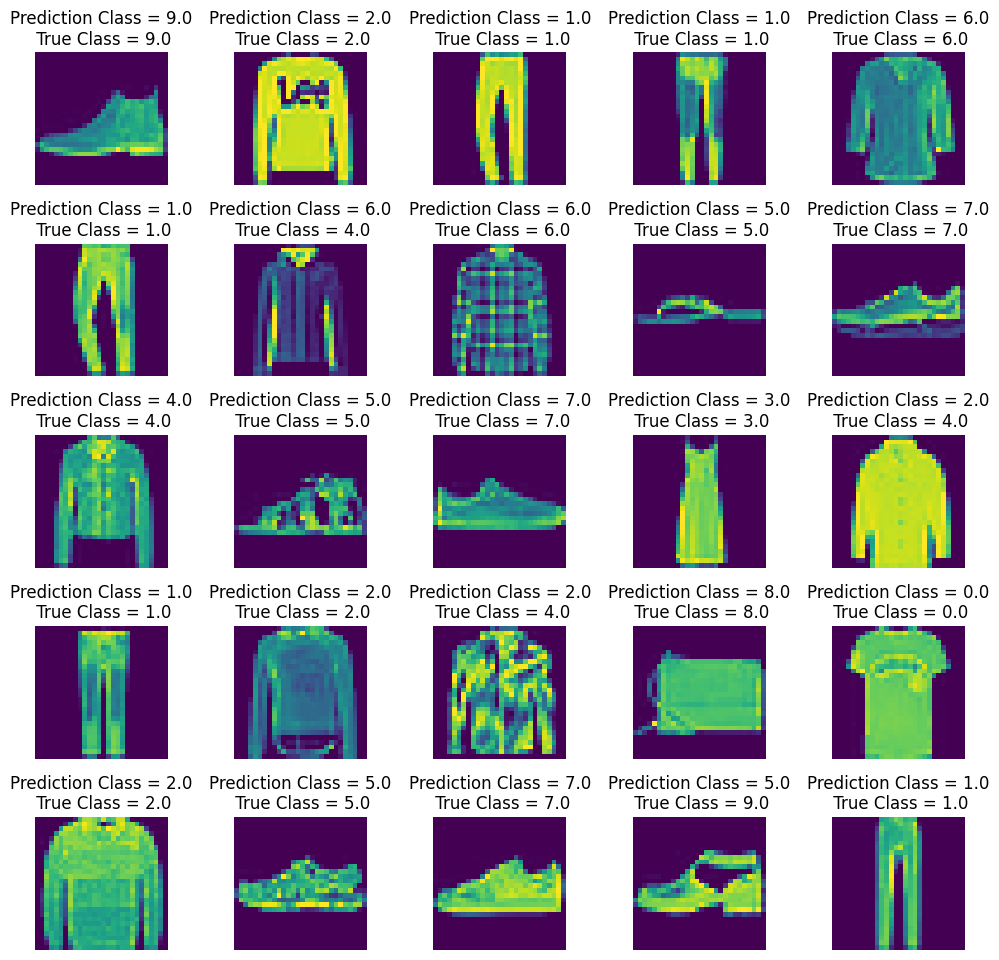

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {(predicted_classes[i]):0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [ ]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.80      0.82      0.81      1000
     Class 1       0.99      0.97      0.98      1000
     Class 2       0.75      0.86      0.80      1000
     Class 3       0.88      0.90      0.89      1000
     Class 4       0.84      0.74      0.79      1000
     Class 5       0.96      0.97      0.97      1000
     Class 6       0.71      0.65      0.68      1000
     Class 7       0.96      0.94      0.95      1000
     Class 8       0.97      0.98      0.97      1000
     Class 9       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



#CNN
Let's here try different archietctures for CNN model  to keep it from overfitting.

In [ ]:
cnn_model = Sequential()


cnn_model.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))


cnn_model.add(Flatten())
cnn_model.add(Dense(units=98, activation='relu'))
cnn_model.add(Dense(units=10, activation='softmax'))

In [ ]:
METRICS = [
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.Accuracy(name='accuracy')
]

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

In [ ]:
epochs = 10
batch_size = 50

history = cnn_model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_validate, y_validate)
)

Epoch 1/10
960/960 [==============================] - 42s 39ms/step - loss: 0.4966 - accuracy: 0.8205 - val_loss: 0.3628 - val_accuracy: 0.8641
Epoch 2/10
960/960 [==============================] - 38s 40ms/step - loss: 0.3469 - accuracy: 0.8734 - val_loss: 0.3033 - val_accuracy: 0.8862
Epoch 3/10
960/960 [==============================] - 37s 38ms/step - loss: 0.3080 - accuracy: 0.8853 - val_loss: 0.2993 - val_accuracy: 0.8892
Epoch 4/10
960/960 [==============================] - 38s 40ms/step - loss: 0.2813 - accuracy: 0.8946 - val_loss: 0.2760 - val_accuracy: 0.8963
Epoch 5/10
960/960 [==============================] - 38s 39ms/step - loss: 0.2639 - accuracy: 0.8997 - val_loss: 0.2643 - val_accuracy: 0.9034
Epoch 6/10
960/960 [==============================] - 38s 40ms/step - loss: 0.2483 - accuracy: 0.9064 - val_loss: 0.2680 - val_accuracy: 0.9018
Epoch 7/10
960/960 [==============================] - 38s 40ms/step - loss: 0.2370 - accuracy: 0.9113 - val_loss: 0.2613 - val_accuracy:

Text(0.5, 1.0, 'Accuracy evolution')

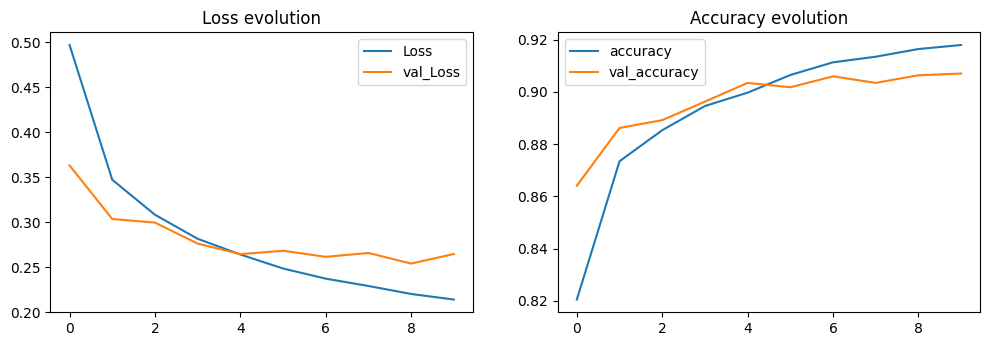

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')

313/313 [==============================] - 3s 9ms/step - loss: 0.2817 - accuracy: 0.9034
Test Accuracy : 0.903


In [ ]:
evaluation = cnn_model.evaluate(X_train, y_train)
print(f'Test Accuracy : {evaluation[1]:.3f}')

1500/1500 [==============================] - 21s 14ms/step - loss: 0.1608 - accuracy: 0.9388
Test Accuracy : 0.939
